## Ahold - Planogram

## Imports

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob
import re
import pickle
import pprint

## Define the path

In [7]:
path = 'C:/Users/arelekar/OneDrive - DXC Production/Documents/Image Processing/Image Registration'

In [8]:
glob.glob (f'{path}/*')

['C:/Users/arelekar/OneDrive - DXC Production/Documents/Image Processing/Image Registration\\Ahold-Text Detection.ipynb',
 'C:/Users/arelekar/OneDrive - DXC Production/Documents/Image Processing/Image Registration\\Ahold-Text.py',
 'C:/Users/arelekar/OneDrive - DXC Production/Documents/Image Processing/Image Registration\\and_operation.py',
 'C:/Users/arelekar/OneDrive - DXC Production/Documents/Image Processing/Image Registration\\design_expt_New.ipynb',
 'C:/Users/arelekar/OneDrive - DXC Production/Documents/Image Processing/Image Registration\\empty_folded_images.jpg',
 'C:/Users/arelekar/OneDrive - DXC Production/Documents/Image Processing/Image Registration\\empty_folded_images_cropped.jpg',
 'C:/Users/arelekar/OneDrive - DXC Production/Documents/Image Processing/Image Registration\\empty_rack.jpg',
 'C:/Users/arelekar/OneDrive - DXC Production/Documents/Image Processing/Image Registration\\empty_template.jpg',
 'C:/Users/arelekar/OneDrive - DXC Production/Documents/Image Processi

## Handy Functions

In [9]:
def display_img (img, figsize=(10, 10)):
    plt.figure (figsize=figsize)
    plt.imshow (img [:,:,::-1])
    plt.show ()

## Read the image

Read the template image

In [10]:
template = cv2.imread (f'{path}/empty_template.jpg')

In [11]:
template.shape

(3490, 1943, 3)

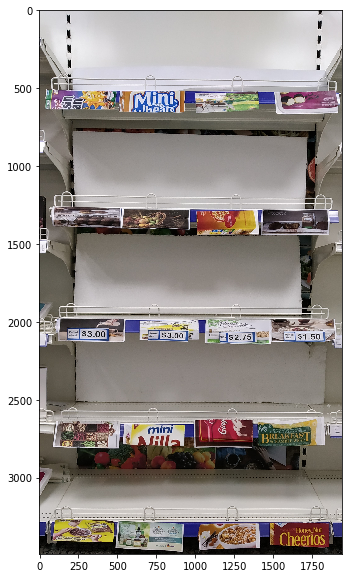

In [12]:
display_img (template)

Read the test image

In [36]:
test = cv2.imread (f'{path}/zoomed1.jpg')

In [37]:
test.shape

(1920, 1080, 3)

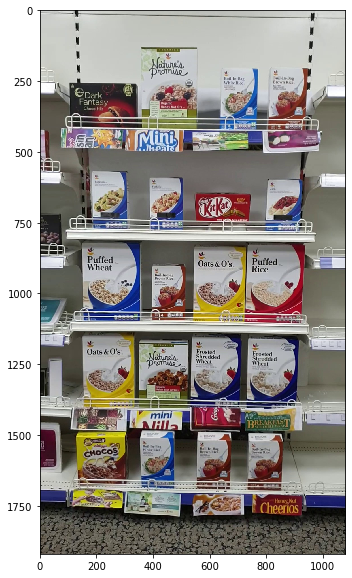

In [38]:
display_img (test)

### Read the coordinates of the bounding boxes

Template - 24 products

In [88]:
template_coordinates = re.findall (
    r'<name>(.*?)[.png]*</name>.*?<xmin>(\d+?)</xmin>.*?<ymin>(\d+?)</ymin>.*?<xmax>(\d+?)</xmax>.*?<ymax>(\d+?)</ymax>', 
    open (f'{path}/zoomed_graph.xml').read (), 
    re.DOTALL
)

In [89]:
template_coordinates = list (map (
    lambda x: [x [0]] + list (map (int, x [1:])),
    template_coordinates
))

In [90]:
template_coordinates

[['dark_fantasy11', 104, 255, 345, 380],
 ['natures_promise_honey12', 353, 133, 560, 381],
 ['boil_in_bag_white_rice13', 638, 205, 770, 380],
 ['boil_in_bag_brown_rice14', 807, 200, 945, 381],
 ['rigatony21', 176, 571, 314, 737],
 ['farfalle22', 385, 590, 510, 739],
 ['kitkat23', 544, 640, 749, 742],
 ['ziti24', 796, 596, 925, 746],
 ['puffed_wheat31', 145, 817, 356, 1064],
 ['boil_in_bag_brown_rice32', 393, 901, 515, 1065],
 ['oats_and_os33', 541, 835, 723, 1071],
 ['puffed_rice34', 731, 827, 926, 1072],
 ['oats_and_os41', 150, 1148, 333, 1369],
 ['natures_promise_raisin42', 348, 1169, 525, 1376],
 ['frosted_shredded_wheat43', 533, 1148, 711, 1379],
 ['frosted_shredded_wheat44', 728, 1156, 907, 1381],
 ['chocos_500g51', 126, 1501, 308, 1654],
 ['boil_in_bag_white_rice52', 352, 1505, 483, 1662],
 ['boil_in_bag_brown_rice53', 549, 1510, 674, 1663],
 ['boil_in_bag_brown_rice54', 731, 1516, 857, 1664]]

In [42]:
# Remove the price tag bounding box
template_coordinates = template_coordinates [:-4]

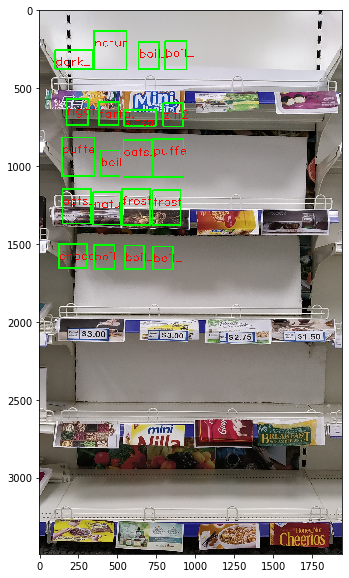

In [78]:
template_copy = template.copy ()

for coord in template_coordinates :
    cv2.rectangle (
        template_copy, 
        tuple (coord [1:3]), 
        tuple (coord [3:]), 
        (0, 255, 0), 
        thickness=10
    )
    cv2.putText (
        template_copy, 
        coord [0] [:5], 
        (coord [1], coord [2]+100), 
        cv2.FONT_HERSHEY_DUPLEX, 
        2.5, 
        (0, 0, 255),
        2
    )
    
display_img (template_copy)

Test Coordinates

In [79]:
import json

In [80]:
test_coordinates = json.loads ('[' + open (f'{path}/zoomed_coordinates.txt').read ().replace ('\n', ',') + ']')

In [81]:
'''
test_coordinates = list (map (
    lambda x: list (map (float, x.split ())),
    re.findall (r'\[([\d\.\s]*?)\]', open (f'{path}/product-coordinates.txt').read ())
))
'''

"\ntest_coordinates = list (map (\n    lambda x: list (map (float, x.split ())),\n    re.findall (r'\\[([\\d\\.\\s]*?)\\]', open (f'{path}/product-coordinates.txt').read ())\n))\n"

In [82]:
test.shape

(1920, 1080, 3)

ymin, xmin, ymax, xmax -- [xmin,ymin,xmax,ymax,accuracy]

In [83]:
test_coordinates

[[153, 819, 346, 1046, 81.96674585342407],
 [544, 843, 720, 1052, 99.76220726966858],
 [156, 1144, 329, 1348, 99.75624084472656],
 [361, 143, 543, 368, 99.69297647476196],
 [742, 834, 923, 1053, 99.06879663467407],
 [541, 1154, 699, 1353, 81.08491897583008],
 [351, 1175, 512, 1364, 97.42833971977234],
 [739, 1163, 897, 1365, 91.66910648345947],
 [554, 640, 730, 741, 93.71744990348816],
 [391, 893, 512, 1054, 89.24269676208496],
 [556, 1518, 670, 1654, 87.66753077507019],
 [157, 815, 346, 1048, 86.10405921936035],
 [110, 269, 335, 382, 81.57616853713989],
 [382, 590, 505, 741, 79.590505361557],
 [734, 1525, 853, 1655, 78.37892770767212],
 [643, 204, 769, 372, 76.80708169937134],
 [802, 608, 918, 732, 73.13915491104126],
 [134, 1517, 296, 1636, 69.34762001037598],
 [739, 833, 918, 1053, 69.0766453742981],
 [811, 211, 940, 370, 34.05035138130188]]

In [84]:
len (test_coordinates)

20

In [60]:
#test_coordinates = (np.array (test_coordinates) * np.array ([test.shape [1]] * 2 + [test.shape [0]] * 2)).astype (int)
#test_coordinates = (np.array (test_coordinates) * np.array ([4000, 3000, 4000, 000])).astype (int)

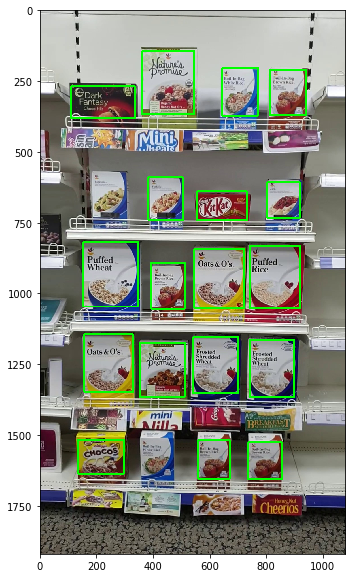

In [62]:
test_map = {}
test_copy = test.copy ()
skip_list = [4, 17] # Duplicate identifications

for i, coord in enumerate (sorted (test_coordinates, key=lambda x: (x [0], x [1]))):
    
    if i in skip_list:
        continue
        
    cv2.rectangle (
        test_copy, 
        tuple (coord [:2]), 
        tuple (coord [2:-1]), 
        (0, 255, 0), 
        thickness=5
    )
    
display_img (test_copy)
    
    #name = input ('Name of the product + row + column')
    
    #test_map [name] = coord [:-1]

In [52]:
len (test_map)

NameError: name 'test_map' is not defined

In [64]:
sorted (test_map.items (), key=lambda x: int (x [0].split (';') [1]))

AttributeError: 'list' object has no attribute 'items'

In [65]:
test_map = [
    ('dark_fantasy;11', [110, 269, 335, 382]),
    ('nature_promise_nut;12', [361, 143, 543, 368]),
    ('white_rice;13', [643, 204, 769, 372]),
    ('brown_rice;14', [811, 211, 940, 370]),
    ('farfalle;22', [382, 590, 505, 741]),
    ('kitkat;23', [554, 640, 730, 741]),
    ('ziti;24', [802, 608, 918, 732]),
    ('puffed_wheat;31', [157, 815, 346, 1048]),
    ('brown_rice;32', [391, 893, 512, 1054]),
    ('oats;33', [544, 843, 720, 1052]),
    ('puffed_rice;34', [739, 833, 918, 1053]),
    ('oats;41', [156, 1144, 329, 1348]),
    ('nature_promise_raisins;42', [351, 1175, 512, 1364]),
    ('shredded_wheat;43', [541, 1154, 699, 1353]),
    ('shredded_wheat;44', [739, 1163, 897, 1365]),
    ('chocos;51', [134, 1517, 296, 1636]),
    ('brown_rice;53', [556, 1518, 670, 1654]),
    ('brown_rice;54', [734, 1525, 853, 1655])
]

In [69]:
test_map = dict (test_map)

In [70]:
pickle.dump (test_map, open (f'{path}/test_map.pkl', 'wb'), pickle.HIGHEST_PROTOCOL)

In [71]:
list (map (
    lambda x: [x [0] + x [1],
    sorted (test_map.items (), key=lambda x: (x [1] [0], x [1] [1]))

SyntaxError: unexpected EOF while parsing (<ipython-input-71-1ac8e91da367>, line 3)

## Define a graph

### Template

In [95]:
# Sort it to reduce the number of searches
template_coordinates = sorted (template_coordinates, key=lambda x: (x [1], x [2]))

In [276]:
template_coordinates

[['dark_fantasy11', 104, 255, 345, 380],
 ['chocos_500g51', 126, 1501, 308, 1654],
 ['puffed_wheat31', 145, 817, 356, 1064],
 ['oats_and_os41', 150, 1148, 333, 1369],
 ['rigatony21', 176, 571, 314, 737],
 ['natures_promise_raisin42', 348, 1169, 525, 1376],
 ['boil_in_bag_white_rice52', 352, 1505, 483, 1662],
 ['natures_promise_honey12', 353, 133, 560, 381],
 ['farfalle22', 385, 590, 510, 739],
 ['boil_in_bag_brown_rice32', 393, 901, 515, 1065],
 ['frosted_shredded_wheat43', 533, 1148, 711, 1379],
 ['oats_and_os33', 541, 835, 723, 1071],
 ['kitkat23', 544, 640, 749, 742],
 ['boil_in_bag_brown_rice53', 549, 1510, 674, 1663],
 ['boil_in_bag_white_rice13', 638, 205, 770, 380],
 ['frosted_shredded_wheat44', 728, 1156, 907, 1381],
 ['puffed_rice34', 731, 827, 926, 1072],
 ['boil_in_bag_brown_rice54', 731, 1516, 857, 1664],
 ['ziti24', 796, 596, 925, 746],
 ['boil_in_bag_brown_rice14', 807, 200, 945, 381]]

In [288]:
# Store the vertices in a dictionary
# Sample - 
# { V1: [(V2, E12), (V3, E13)...], V2: [(V1, E12), (V3, E23)..], ... }

template_graph = {}

for i, coordinates in enumerate (template_coordinates):
    # Min distances
    min_right = min_left = min_top = min_bottom = min_right_bottom=min_left_bottom = min_right_top=min_top_left= None
    left_node = right_node = top_node = bottom_node = bottom_right_node= bottom_left_node=top_right_node=top_left_node= None
    
    # Check its neighbors (8 directions)
    for neighbor in template_coordinates [:i] + template_coordinates [i+1:]:
        # Find the closet neighbor
        
        #print (neighbor, coordinates)
        if (coordinates [1] < neighbor [1]) and (coordinates [4] > neighbor [2])and abs(coordinates[1]-neighbor[1])>50: # Right
            # Take the distance from the center of the right edge of the currrent box
            # to the center of the left edge of the neighbor
            # dist = neighbor [1] - coordinates [1]
            dist = np.sqrt (
                (coordinates [3]-neighbor [1])**2 + (coordinates [2]-neighbor [2])**2
            )
            
            if min_right == None or dist < min_right :
                if dist<250:
                    min_right = dist
                    right_node = neighbor [0]
                
        if (coordinates [4] < neighbor [2]) and (neighbor [1] < coordinates [3]): # Bottom
            #dist = neighbor [2] - coordinates [4]
            dist = np.sqrt (
                (coordinates [1]-neighbor [1])**2 + (coordinates [4]-neighbor [2])**2
            )
            
            if min_bottom == None or dist < min_bottom:
                min_bottom = dist
                bottom_node = neighbor [0]
                
        if (coordinates [1] > neighbor [3]) and (coordinates [4] > neighbor [2]): # Left
            dist = np.sqrt (
                (coordinates [1]-neighbor [3])**2 + (coordinates [2]-neighbor [2])**2
            )
            
            if min_left == None or dist < min_left:
                min_left = dist
                left_node = neighbor [0]
                
                
        if (coordinates [2] > neighbor [4]) and (neighbor [1] < coordinates [3]): # Top
            #dist = neighbor [2] - coordinates [4]
            dist = np.sqrt (
                (coordinates [1]-neighbor [1])**2 + (coordinates [2]-neighbor [4])**2
            )
            
            if min_top == None or dist < min_top:
                min_top = dist
                top_node = neighbor [0]
            
         
        
        if (coordinates [4] < neighbor [2]) and (abs(coordinates [3] - neighbor [1])<50 or coordinates [3] < neighbor [1]): # Bottom-right
            dist = np.sqrt (
                (coordinates [3]-neighbor [1])**2 + (coordinates [4]-neighbor [2])**2
            )
            
            if min_right_bottom == None or dist < min_right_bottom:
                min_right_bottom = dist
                bottom_right_node = neighbor [0]
        
        
        if (coordinates [4] < neighbor [2]) and (coordinates [1] > neighbor [3]): # Bottom-left
            dist = np.sqrt (
                (coordinates [1]-neighbor [3])**2 + (coordinates [4]-neighbor [2])**2
            )
            
            if min_left_bottom == None or dist < min_left_bottom:
                min_left_bottom = dist
                bottom_left_node = neighbor [0]
        
            
            
    # Create a vertex
    template_graph [coordinates [0]] = [
        [right_node, 'right',min_right], 
        [bottom_node, 'bottom',min_bottom],
        [left_node, 'left',min_left],
        [top_node, 'top',min_top],
        [bottom_right_node,"bottom_right",min_right_bottom],
        [bottom_left_node,"bottom_left",min_left_bottom]
    ]
    
pprint.pprint (template_graph)

{'boil_in_bag_brown_rice14': [[None, 'right', None],
                              ['ziti24', 'bottom', 215.2812114421507],
                              ['boil_in_bag_white_rice13',
                               'left',
                               37.33630940518894],
                              [None, 'top', None],
                              [None, 'bottom_right', None],
                              ['kitkat23', 'bottom_left', 265.41476974727686]],
 'boil_in_bag_brown_rice32': [['oats_and_os33', 'right', 70.9365914038728],
                              ['natures_promise_raisin42',
                               'bottom',
                               113.3181362359971],
                              ['puffed_wheat31', 'left', 91.7877987534291],
                              ['farfalle22', 'top', 162.19741058352318],
                              ['frosted_shredded_wheat43',
                               'bottom_right',
                               84.92938243034621],
   

In [240]:
pro_cor_list=[['puffed_wheat: 99%', 153, 820, 347, 1048], ['oats_and_os: 99%', 547, 841, 721, 1048],
 ['natures_promise_honey: 99%', 362, 141, 545, 365], ['oats_and_os: 99%', 153, 1146, 331, 1347],
 ['puffed_rice: 99%', 745, 833, 924, 1054], ['frosted_shredded_wheat: 98%', 542, 1155, 698, 1355],
 ['natures_promise_raisin: 98%', 352, 1173, 514, 1364], ['frosted_shredded_wheat: 96%', 739, 1161, 897, 1364],
['boil_in_bag_brown_rice: 86%', 736, 1526, 852, 1658],
 ['kitkat: 84%', 556, 643, 734, 740], ['boil_in_bag_brown_rice: 81%', 392, 889, 513, 1054],
 ['boil_in_bag_brown_rice: 77%', 644, 202, 768, 369], ['boil_in_bag_brown_rice: 75%', 557, 1515, 671, 1656],
 ['ziti: 70%', 801, 606, 920, 734],
 ['dark_fantasy: 64%', 105, 264, 337, 372]]

In [289]:
def calc_left_dist(coordinates,neighbor):
    return(np.sqrt (
                (coordinates [1]-neighbor [3])**2 + (coordinates [2]-neighbor [2])**2
            ))

def calc_right_dist(coordinates,neighbor):
    return( np.sqrt (
                (coordinates [3]-neighbor [1])**2 + (coordinates [2]-neighbor [2])**2
            ))

def calc_top_dist(coordinates,neighbor):
    return( np.sqrt (
                (coordinates [1]-neighbor [1])**2 + (coordinates [2]-neighbor [4])**2))

def calc_bottom_dist(coordinates,neighbor):
    return( np.sqrt (
                (coordinates [1]-neighbor [1])**2 + (coordinates [4]-neighbor [2])**2))

def calc_bottom_right_dist(coordinates,neighbor):
    return( np.sqrt (
                (coordinates [3]-neighbor [1])**2 + (coordinates [4]-neighbor [2])**2
            ))

def calc_bottom_left_dist(coordinates,neighbor):
    return(  np.sqrt (
                (coordinates [1]-neighbor [3])**2 + (coordinates [4]-neighbor [2])**2
            ))



In [242]:
i=1
print(pro_cor_list[i])
print(pro_cor_list[:i]+pro_cor_list[i+1:])

['oats_and_os: 99%', 547, 841, 721, 1048]
[['puffed_wheat: 99%', 153, 820, 347, 1048], ['natures_promise_honey: 99%', 362, 141, 545, 365], ['oats_and_os: 99%', 153, 1146, 331, 1347], ['puffed_rice: 99%', 745, 833, 924, 1054], ['frosted_shredded_wheat: 98%', 542, 1155, 698, 1355], ['natures_promise_raisin: 98%', 352, 1173, 514, 1364], ['frosted_shredded_wheat: 96%', 739, 1161, 897, 1364], ['boil_in_bag_brown_rice: 86%', 736, 1526, 852, 1658], ['kitkat: 84%', 556, 643, 734, 740], ['boil_in_bag_brown_rice: 81%', 392, 889, 513, 1054], ['boil_in_bag_brown_rice: 77%', 644, 202, 768, 369], ['boil_in_bag_brown_rice: 75%', 557, 1515, 671, 1656], ['ziti: 70%', 801, 606, 920, 734], ['dark_fantasy: 64%', 105, 264, 337, 372]]


In [306]:
missing_misplaced=[]
pro_score={}
prod=""
k=0
for i in range(0,len(pro_cor_list)):
    print("\n\n")
    flag=0
    count=0
    print(pro_cor_list[i][0])
    for temp_cor in template_graph.keys():
        if(pro_cor_list[i][0].split(":")[0]==temp_cor[:-2]):
            prod=temp_cor
            for neighbor_pro in template_graph[temp_cor]:
                if(neighbor_pro[0]==None):
                        continue
                else:
                    for n_pro in pro_cor_list[:i]+pro_cor_list[i+1:]:
                        print(n_pro,neighbor_pro)
                        dir=""
                        dist=0
                        if(neighbor_pro[0][:-2]==n_pro[0].split(":")[0]):
                            
                            if (pro_cor_list[i][1] < n_pro[1]) and (pro_cor_list[i][4] > n_pro[2]) and abs(pro_cor_list[i][1]-n_pro[1])>50:
                                dir="right"
                                dist=calc_right_dist(pro_cor_list[i],n_pro)
                            if(pro_cor_list[i][4] < n_pro[2]) and ((abs(pro_cor_list[i][1]-n_pro[1])<50 or abs(pro_cor_list[i][3]-n_pro[3])<50)):
                                dir="bottom"
                                dist=calc_bottom_dist(pro_cor_list[i],n_pro)
                            if(pro_cor_list[i][1] > n_pro[3]) and (pro_cor_list[i][4] > n_pro[2]):
                                dir="left"
                                dist=calc_left_dist(pro_cor_list[i],n_pro)
                            if(pro_cor_list[i][2] > n_pro[4]) and (n_pro[1] < pro_cor_list[i][3]):
                                dir="top"
                                dist=calc_top_dist(pro_cor_list[i],n_pro)
                            if(pro_cor_list[i][4] < n_pro [2]) and (abs(pro_cor_list[i] [3] - n_pro[1])<50 or pro_cor_list[i][3] < n_pro[1]):
                                dir="bottom_right"
                                dist=calc_bottom_right_dist(pro_cor_list[i],n_pro)
                            if(pro_cor_list[i] [4] < n_pro [2]) and (pro_cor_list[i] [1] > n_pro [3]):
                                dir="bottom_left"
                                dist=calc_bottom_left_dist(pro_cor_list[i],n_pro)
    
                            
                            print(dir,dist)
                            if neighbor_pro[1]==dir and abs(neighbor_pro[2]-dist)<50:
                                print(pro_cor_list[i][0]+"-->"+ n_pro[0])
                                print("nighbor in right place")
                                count+=1
                                pro_score[prod]=count
                                break
                                
                                
                            #elif dist>50 and neighbor_pro[1]!=dir  and abs(neighbor_pro[2]-dist)<100:
                             #   print(pro_cor_list[i][0]+"-->"+ n_pro[0])
                              #  print("neighbor misplaced")
                               #if prod not in missing_misplaced:
                                #    missing_misplaced.append(prod)
                
                            else:
                                #if pro_cor_list[i]
                                continue
                
                                
                
            
print(pro_score)
print("missing or misplaced:")
print(missing_misplaced)
                            
                                
                    
                        
                
        




puffed_wheat: 99%
['oats_and_os: 99%', 547, 841, 721, 1048] ['boil_in_bag_brown_rice32', 'right', 91.7877987534291]
['natures_promise_honey: 99%', 362, 141, 545, 365] ['boil_in_bag_brown_rice32', 'right', 91.7877987534291]
['oats_and_os: 99%', 153, 1146, 331, 1347] ['boil_in_bag_brown_rice32', 'right', 91.7877987534291]
['puffed_rice: 99%', 745, 833, 924, 1054] ['boil_in_bag_brown_rice32', 'right', 91.7877987534291]
['frosted_shredded_wheat: 98%', 542, 1155, 698, 1355] ['boil_in_bag_brown_rice32', 'right', 91.7877987534291]
['natures_promise_raisin: 98%', 352, 1173, 514, 1364] ['boil_in_bag_brown_rice32', 'right', 91.7877987534291]
['frosted_shredded_wheat: 96%', 739, 1161, 897, 1364] ['boil_in_bag_brown_rice32', 'right', 91.7877987534291]
['boil_in_bag_brown_rice: 86%', 736, 1526, 852, 1658] ['boil_in_bag_brown_rice32', 'right', 91.7877987534291]
bottom_right 616.283214115069
['kitkat: 84%', 556, 643, 734, 740] ['boil_in_bag_brown_rice32', 'right', 91.7877987534291]
['boil_in_bag_b

['dark_fantasy: 64%', 105, 264, 337, 372] ['frosted_shredded_wheat44', 'top', 135.03332921912278]
['puffed_wheat: 99%', 153, 820, 347, 1048] ['ziti24', 'bottom', 215.2812114421507]
['oats_and_os: 99%', 547, 841, 721, 1048] ['ziti24', 'bottom', 215.2812114421507]
['natures_promise_honey: 99%', 362, 141, 545, 365] ['ziti24', 'bottom', 215.2812114421507]
['oats_and_os: 99%', 153, 1146, 331, 1347] ['ziti24', 'bottom', 215.2812114421507]
['puffed_rice: 99%', 745, 833, 924, 1054] ['ziti24', 'bottom', 215.2812114421507]
['frosted_shredded_wheat: 98%', 542, 1155, 698, 1355] ['ziti24', 'bottom', 215.2812114421507]
['natures_promise_raisin: 98%', 352, 1173, 514, 1364] ['ziti24', 'bottom', 215.2812114421507]
['frosted_shredded_wheat: 96%', 739, 1161, 897, 1364] ['ziti24', 'bottom', 215.2812114421507]
['boil_in_bag_brown_rice: 86%', 736, 1526, 852, 1658] ['ziti24', 'bottom', 215.2812114421507]
['kitkat: 84%', 556, 643, 734, 740] ['ziti24', 'bottom', 215.2812114421507]
['boil_in_bag_brown_rice: 77%

In [257]:
template_coordinates [0:2]

[['dark_fantasy11', 104, 255, 345, 380],
 ['chocos_500g51', 126, 1501, 308, 1654]]

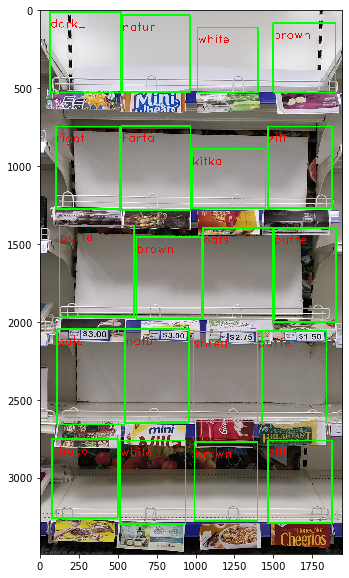

In [123]:
display_img (template_copy)

#### Computer the centers of the bounding box to use the nodes

In [59]:
template_centers_coord = list (map (
    lambda x: [x [0], int (np.mean (x [1::2])), int (np.mean (x [2::2]))],
    template_coordinates
))

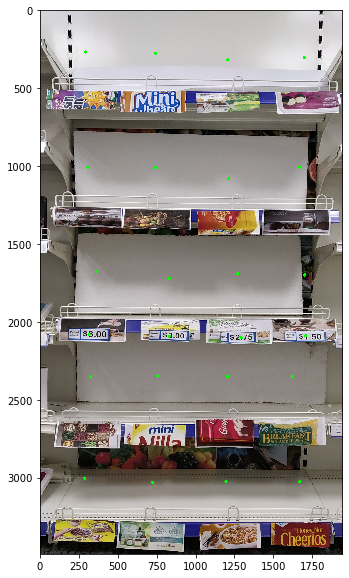

In [61]:
template_centers = template.copy ()
for coord in template_centers_coord:
    cv2.circle (template_centers, tuple (coord [1:]), 5, (0, 255, 0), thickness=10)
display_img (template_centers)